In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Input dataset

In [2]:
df = pd.read_csv('data.csv')

# Menampilkan 5 data teratas

In [3]:
df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


# Menampilkan dataset yang kosong

In [4]:
df.isnull().sum()

,0
Customer ID,0
Gender,0
Age,0
City,0
Membership Type,0
Total Spend,0
Items Purchased,0
Average Rating,0
Discount Applied,0
Days Since Last Purchase,0


# Menghapus data yang kosong

In [5]:
df.dropna(subset=['Satisfaction Level'], inplace=True)

# Melakukan standarisasi pada dataset

In [6]:
numeric_cols = df.select_dtypes(include=['number']).columns

scaler = StandardScaler()

df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Melakukan label encoding pada dataset

In [7]:
encoder = LabelEncoder()

kategorical_cols = ['Gender', 'City', 'Membership Type', 'Discount Applied']

for col in kategorical_cols:
    df[col] = encoder.fit_transform(df[col].astype(str))

In [8]:
df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,-1.728843,0,-0.939761,4,1,0.754230,0.330381,0.996757,1,-0.120022,Satisfied
1,-1.718957,1,0.086720,2,2,-0.186319,-0.394236,0.132172,0,-0.640260,Neutral
2,-1.709072,0,1.934386,0,0,-0.933192,-0.877314,-1.078247,1,1.143413,Unsatisfied
3,-1.699187,1,-0.734465,5,1,1.751261,1.538076,1.169674,0,-1.086179,Satisfied
4,-1.689301,1,-1.350354,3,2,-0.352721,0.088842,-0.040745,1,2.109570,Unsatisfied


# Membagi dataset menjadi data training dan data testing
data training = 70%
<br>
data testing = 30%

In [9]:
X = df.drop(columns=['Satisfaction Level', 'Customer ID'])
y = df['Satisfaction Level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Membuat model Suport Vector Machine
- Model dibuat menggunakan kernel rbf yang bertujuan untuk membuat pemisahan non-linear
- C=1 bertujuan untuk model lebih menerima beberapa error agar generalisasi lebih baik.
- gamma='scale' untuk mengatur jangkauan pengaruh satu titik data secara otomatis berdasarkan dataset

In [10]:
model = SVC(kernel='rbf', C=1, gamma='scale')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Menampilkan laporan klasifikasi
Model SVM dengan kernel RBF menunjukkan performa sangat baik:

- Akurasi ~99%

- Semua kelas diprediksi hampir sempurna

- Precision, Recall, F1-score tinggi untuk tiap kelas

In [11]:
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))

Akurasi: 0.9904761904761905

Laporan Klasifikasi:
               precision    recall  f1-score   support

     Neutral       0.98      1.00      0.99        40
   Satisfied       1.00      0.97      0.99        40
 Unsatisfied       1.00      1.00      1.00        25

    accuracy                           0.99       105
   macro avg       0.99      0.99      0.99       105
weighted avg       0.99      0.99      0.99       105



# Menampilkan confusion matrix
- 0 = Neutral
- 1 = Satisfied
- 2 = Unsatisfied

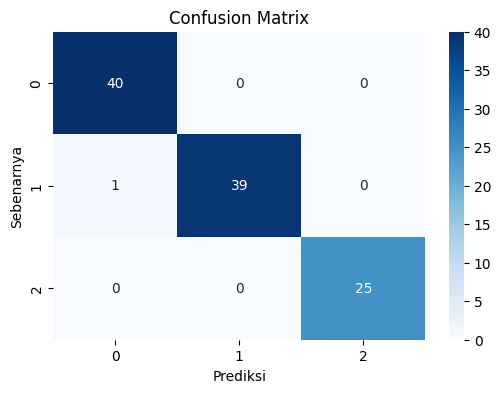

In [12]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Prediksi")
plt.ylabel("Sebenarnya")
plt.title("Confusion Matrix")
plt.show()

# Menampilkan plot untuk membandingkan nilai asli dengan prediksi model

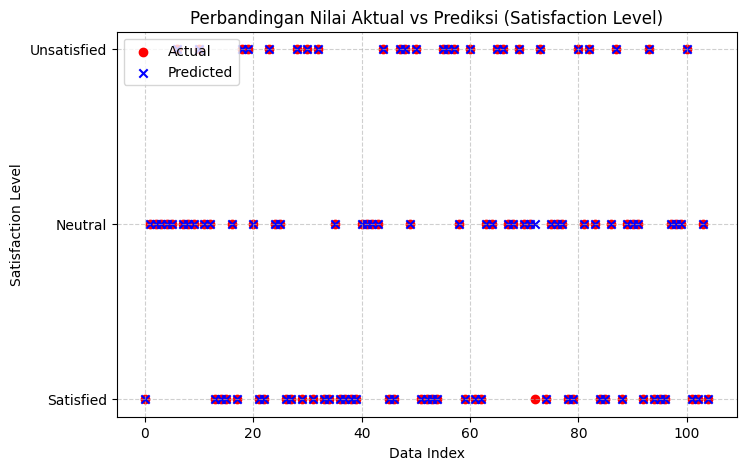

In [13]:
plt.figure(figsize=(8, 5))
plt.scatter(range(len(y_test)), y_test, label='Actual', marker='o', color='red')
plt.scatter(range(len(y_pred)), y_pred, label='Predicted', marker='x', color='blue')
plt.title("Perbandingan Nilai Aktual vs Prediksi (Satisfaction Level)")
plt.xlabel("Data Index")
plt.ylabel("Satisfaction Level")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()